In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
clicks_df = pd.read_csv('stud_dates_click.csv')
clicks_df

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
stud_df = pd.read_csv('./data/studentInfo.csv')
stud_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [4]:
# merge three table for further processing
data = pd.merge(stud_df, clicks_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# no of records based on course
data['code_module'].value_counts()

BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: code_module, dtype: int64

In [6]:
# no of pass fail student based on course
data.groupby(['code_module', 'final_result'])['id_student'].count()

code_module  final_result
AAA          Distinction       44
             Fail              91
             Pass             487
             Withdrawn        126
BBB          Distinction      677
             Fail            1767
             Pass            3077
             Withdrawn       2388
CCC          Distinction      498
             Fail             781
             Pass            1180
             Withdrawn       1975
DDD          Distinction      383
             Fail            1412
             Pass            2227
             Withdrawn       2250
EEE          Distinction      356
             Fail             562
             Pass            1294
             Withdrawn        722
FFF          Distinction      670
             Fail            1711
             Pass            2978
             Withdrawn       2403
GGG          Distinction      396
             Fail             728
             Pass            1118
             Withdrawn        292
Name: id_student, dtyp

In [7]:
# change the label of target
data['final_result'] = data['final_result'].map({'Pass':1, 'Distinction':1, 'Withdrawn':0, 'Fail':0})

# split the data into train and test
dataX = data.drop(columns='final_result')
target = data['final_result']
X_train, X_test, y_train, y_test = train_test_split(dataX, target, test_size=0.2, stratify=target)

In [8]:
X_train['code_module'].value_counts(), X_test['code_module'].value_counts()

(BBB    6334
 FFF    6209
 DDD    5085
 CCC    3514
 EEE    2345
 GGG    1997
 AAA     590
 Name: code_module, dtype: int64, BBB    1575
 FFF    1553
 DDD    1187
 CCC     920
 EEE     589
 GGG     537
 AAA     158
 Name: code_module, dtype: int64)

In [9]:
X_train['result'] = y_train

# course AAA
aX = X_train.query('code_module=="AAA"')
a_y = aX['result']

# course BBB
bX = X_train.query('code_module=="BBB"')
b_y = bX['result']

# course CCC
cX = X_train.query('code_module=="CCC"')
c_y = cX['result']

# course DDD
dX = X_train.query('code_module=="DDD"')
d_y = dX['result']

# course EEE
eX = X_train.query('code_module=="EEE"')
e_y = eX['result']

# course FFF
fX = X_train.query('code_module=="FFF"')
f_y = fX['result']

# course GGG
gX = X_train.query('code_module=="GGG"')
g_y = gX['result']

In [10]:
def prepare_data(X, rule='W'):
    
    #clicks data
    cols = [str(i) for i in range(-25, 270)]
    X1 = X[cols]
    X1 = X1.T
    X1.index = pd.date_range(start='1/1/2014', periods=295)
    X1 = X1.resample(rule).sum()
    X1 = X1.T
    
    # code_module
    course = X['code_module']
            
    return X1, course

def visualize_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Train', 'Validation'])
    plt.show()

In [11]:
# prepare the data
ax, _ = prepare_data(aX)
bx, _ = prepare_data(bX)
cx, _ = prepare_data(cX)
dx, _ = prepare_data(dX)
ex, _ = prepare_data(eX)
fx, _ = prepare_data(fX)
gx, _ = prepare_data(gX)

X_test_clicks, courses = prepare_data(X_test)

# print stastic
print('Train Data:', ax.shape, bx.shape, cx.shape)
print('Test Data: ', X_test_clicks.shape)
print('Test target count:', Counter(y_test))

Train Data: (590, 43) (6334, 43) (3514, 43)
Test Data:  (6519, 43)
Test target count: Counter({0: 3442, 1: 3077})


In [12]:
# change the dimension
ax = ax.to_numpy().reshape(ax.shape[0], ax.shape[1], 1)
bx = bx.to_numpy().reshape(bx.shape[0], bx.shape[1], 1)
cx = cx.to_numpy().reshape(cx.shape[0], cx.shape[1], 1)
dx = dx.to_numpy().reshape(dx.shape[0], dx.shape[1], 1)
ex = ex.to_numpy().reshape(ex.shape[0], ex.shape[1], 1)
fx = fx.to_numpy().reshape(fx.shape[0], fx.shape[1], 1)
gx = gx.to_numpy().reshape(gx.shape[0], gx.shape[1], 1)

In [13]:
from tensorflow.keras.layers import Dense, Input, Conv1D, AveragePooling1D, Flatten, Add, Multiply, Softmax, LSTM
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model

# CNN base model

In [14]:
# define model
def define_model():
    clicks_cnn = Sequential()
    clicks_cnn.add(Input(shape=(X_test_clicks.shape[1], 1)))
    clicks_cnn.add(Conv1D(32, kernel_size=2, activation='relu'))
    clicks_cnn.add(layers.BatchNormalization())
    clicks_cnn.add(AveragePooling1D(2))
    clicks_cnn.add(Conv1D(64, kernel_size=2, activation='relu'))
    clicks_cnn.add(layers.BatchNormalization())
    clicks_cnn.add(AveragePooling1D(2))
    clicks_cnn.add(Conv1D(128, kernel_size=2, activation='relu'))
    clicks_cnn.add(layers.BatchNormalization())
    clicks_cnn.add(AveragePooling1D(2))
    clicks_cnn.add(Flatten())
    clicks_cnn.add(Dense(128,  activation='relu'))
    clicks_cnn.add(Dense(64,  activation='relu'))
    clicks_cnn.add(Dense(32,  activation='relu'))
    clicks_cnn.add(Dense(1,  activation='sigmoid'))

    # compile the modela
    clicks_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return clicks_cnn

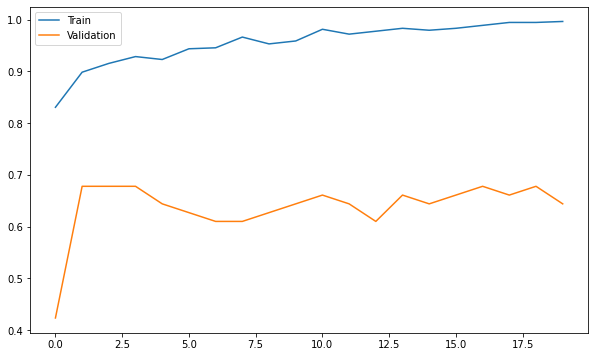

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

path1 = 'best_model_1.h5'
callbacks = ModelCheckpoint(path1, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model1 = define_model()
hist = model1.fit(ax, a_y, validation_split=0.1, epochs=20, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

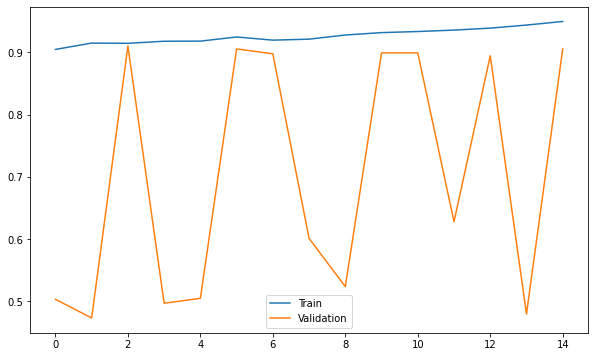

In [16]:
path2 = 'best_model_2.h5'
callbacks = ModelCheckpoint(path2, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model2 = define_model()
hist = model2.fit(bx, b_y, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

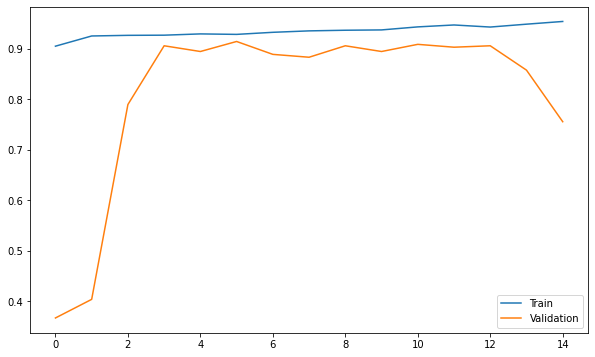

In [17]:
path3 = 'best_model_3.h5'
callbacks = ModelCheckpoint(path3, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model3 = define_model()
hist = model3.fit(cx, c_y, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

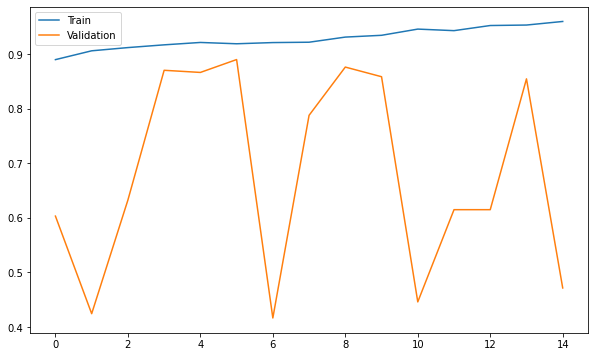

In [18]:
path4 = 'best_model_4.h5'
callbacks = ModelCheckpoint(path4, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model4 = define_model()
hist = model4.fit(dx, d_y, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

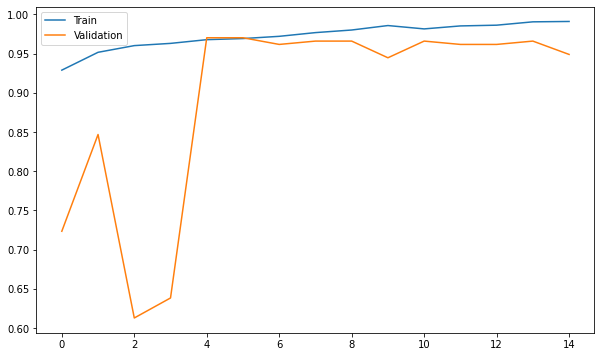

In [19]:
path5 = 'best_model_5.h5'
callbacks = ModelCheckpoint(path5, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model5 = define_model()
hist = model5.fit(ex, e_y, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

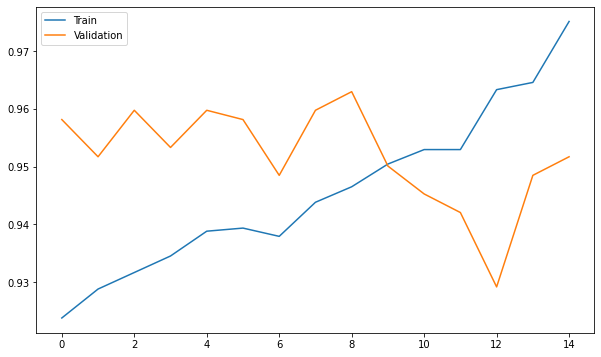

In [20]:
path6 = 'best_model_6.h5'
callbacks = ModelCheckpoint(path6, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model6 = define_model()
hist = model6.fit(fx, f_y, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

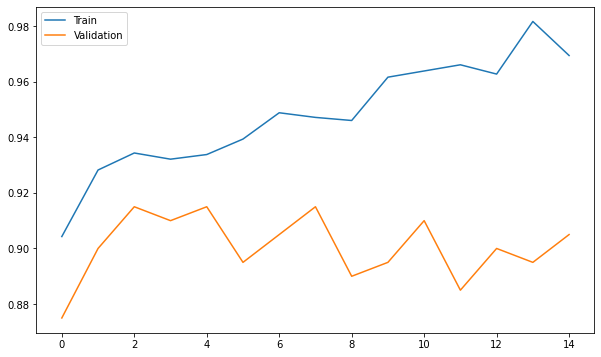

In [21]:
path7 = 'best_model_7.h5'
callbacks = ModelCheckpoint(path7, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model7 = define_model()
hist = model7.fit(gx, g_y, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

In [22]:
prediction = []

# load model
model1.load_weights(path1)
model2.load_weights(path2)
model3.load_weights(path3)
model4.load_weights(path4)
model5.load_weights(path5)
model6.load_weights(path6)
model7.load_weights(path7)

for i in range(len(X_test_clicks)):
    cm = courses.iloc[i]
    if cm=='AAA':        
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, 43, 1)
        prediction.append(model1.predict(test)[0][0])
    elif cm=='BBB':
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, 43, 1)
        prediction.append(model2.predict(test)[0][0])
    elif cm=='CCC':
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, 43, 1)
        prediction.append(model3.predict(test)[0][0])
    elif cm=='DDD':
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, 43, 1)
        prediction.append(model4.predict(test)[0][0])
    elif cm=='EEE':
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, 43, 1)
        prediction.append(model5.predict(test)[0][0])
    elif cm=='FFF':
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, 43, 1)
        prediction.append(model6.predict(test)[0][0])
    else:
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, 43, 1)
        prediction.append(model7.predict(test)[0][0])

In [23]:
predict = np.array(prediction)
predict = np.where(predict>0.5, 1, 0)
accuracy_score(predict, y_test)

0.9229943242828654

In [24]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3122
           1       0.97      0.88      0.92      3397

    accuracy                           0.92      6519
   macro avg       0.93      0.92      0.92      6519
weighted avg       0.93      0.92      0.92      6519



In [25]:
pd.DataFrame(confusion_matrix(predict, y_test), index=[0,1], columns=[0,1])

,0,1
0,3031,91
1,411,2986
